Filename: ./images/image1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     167   (300, 300)   float32   
Image Data :  [[7233. 4904. 3869. ... 6323. 5806. 4771.]
 [4387. 4128. 4128. ... 5288. 4253. 4253.]
 [3869. 3611. 3611. ... 5288. 5288. 4253.]
 ...
 [7226. 6579. 5027. ... 4208. 4208. 4208.]
 [4639. 4509. 5027. ... 4208. 4208. 4208.]
 [3992. 3474. 3992. ... 4725. 4208. 3949.]]
<class 'numpy.ndarray'>
(300, 300)
(90000,)
17940.0
2827.0
[2827.0, 2852.0, 2854.0, 2856.0, 2858.0, 2867.0, 2888.0, 2918.0, 2928.0, 2936.0, 2968.0, 2975.0, 3024.0, 3041.0, 3065.0, 3068.0, 3072.0, 3074.0, 3084.0, 3093.0, 3098.0, 3139.0, 3143.0, 3149.0, 3149.0, 3154.0, 3162.0, 3170.0, 3170.0, 3235.0, 3283.0, 3306.0, 3339.0]


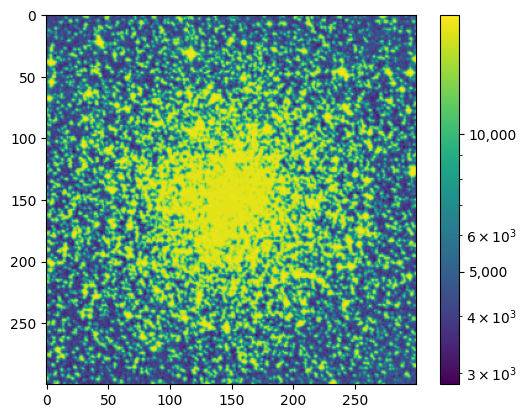

In [8]:
import os
from astropy.io import fits
from astropy.utils.data import download_file
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

image_file = './images/image1.fits'
absolute_path = os.path.abspath(image_file)

# image_file = download_file('images/image1.fits', cache=True )
hdu_list = fits.open(image_file)
hdu_list.info()
# print(hdu_list.data)
image_data = hdu_list[0].data
print("Image Data : ", image_data)
print(type(image_data))
print(image_data.shape)
hdu_list.close()
plt.imshow(image_data)
# print('Min:', np.min(image_data))
# print('Max:', np.max(image_data))
# print('Mean:', np.mean(image_data))
# print('Stdev:', np.std(image_data))
print(image_data.flatten().shape)
#histogram = plt.hist(image_data.flatten(), bins='auto')
plt.imshow(image_data, norm=LogNorm())
cbar = plt.colorbar(ticks=[5.e3,1.e4,2.e4])
cbar.ax.set_yticklabels(['5,000','10,000','20,000'])
print(np.max(image_data[150:,:]))
print(np.min(image_data[:,0:250]))


# np.min(image_data[i:i+49,j:j+49])>=3500


bg=[]
for i in range(0,250,49):
    for j in range(0,250,49):
        if(np.min(image_data[i:i+49,j:j+49])>=3500):
            continue
        else:
            bg.append(np.min(image_data[i:i+49,j:j+49]))
# print(bg)
bg.sort()
print(bg)

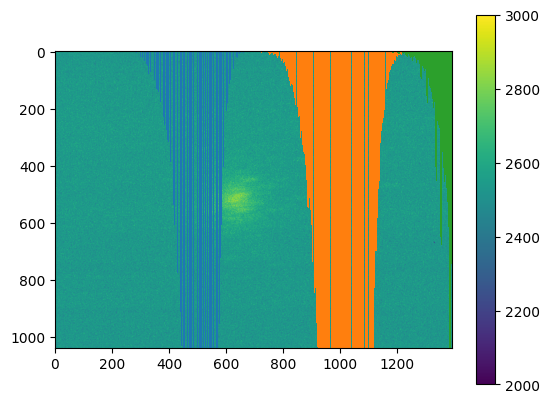

In [9]:
base_url = 'http://data.astropy.org/tutorials/FITS-images/M13_blue_{0:04d}.fits'

image_list = [download_file(base_url.format(n), cache=True) 
              for n in range(1, 5+1)]
image_concat = [fits.getdata(image) for image in image_list]
final_image = np.zeros(shape=image_concat[0].shape)

for image in image_concat:
    final_image += image
    image_hist = plt.hist(final_image.flatten(), bins='auto')
plt.imshow(final_image, vmin=2E3, vmax=3E3)
plt.colorbar()

In [10]:
from astropy.io import fits
from astropy.utils.data import download_file
import matplotlib.pyplot as plt
import numpy as np

image_file2 = 'images/Jupiter406.FITS'
absolute_path2 = os.path.abspath(image_file2)

hdu_list = fits.open(absolute_path2)
hdu_list.info()
hdu_list=fits.open(image_file2)
#hdu_list.info()
image2_data = hdu_list[0].data
print(image2_data.shape)
hdu_list.close()
#plt.imshow(image2_data)
(image2_data[100:400,200:350])
print(np.mean(image2_data))

Filename: C:\Users\Dell\OneDrive - Indian Institute of Technology Guwahati\Desktop\FITS_Analyzer\Astronomical-Data-Analysis\images\Jupiter406.FITS
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      71   (650, 500)   int16   
(500, 650)
300.6194953846154


In [11]:
(image2_data[100:400,200:350])

array([[272, 276, 272, ..., 272, 270, 273],
       [269, 272, 270, ..., 271, 270, 270],
       [271, 269, 270, ..., 271, 271, 272],
       ...,
       [271, 272, 272, ..., 277, 276, 277],
       [271, 272, 271, ..., 276, 276, 276],
       [271, 271, 271, ..., 277, 274, 279]], dtype=int16)

In [12]:
from astropy.io import fits
from astropy.utils.data import download_file
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
image_file = download_file('images/m65.fits', cache=True )
hdu_list = fits.open(image_file)
#hdu_list.info()
image_data = hdu_list[0].data
print(type(image_data))
print(image_data.shape)
hdu_list.close()
#plt.imshow(image_data)
print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Stdev:', np.std(image_data))
print(image_data.flatten().shape)

#histogram = plt.hist(image_data.flatten(), bins='auto')
#plt.imshow(image_data, norm=LogNorm())
# cbar = plt.colorbar(ticks=[5.e3,1.e4,2.e4])
# cbar.ax.set_yticklabels(['5,000','10,000','20,000'])
# print(np.max(image_data))
# print(np.min(image_data))


# np.min(image_data[i:i+49,j:j+49])>=3500

bg_org=[]
bg=[]
for i in range(0,250,10):
    for j in range(0,250,10):
        if(np.min(image_data[i:i+9,j:j+9])>=3710.5588):
            continue
        else:
            bg.append(np.min(image_data[i:i+9,j:j+9]))
            
#print(bg)
#bg.sort()
#print(bg)

bg_ar=np.array(bg)
#print(bg_ar)

bg_org_ar=np.array(bg_org)

print(bg_org_ar)

plt.hist(bg_ar, bins='auto')

ValueError: Malformed URL: 'images/m65.fits'

<class 'numpy.ndarray'>
(4108, 4096)
(16826368,)
51151
359


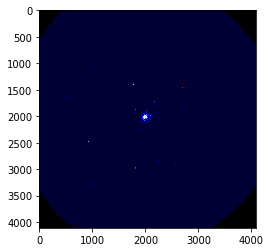

In [26]:
from astropy.io import fits
from astropy.utils.data import download_file
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
image_file = download_file('file:///D:/Fits/Messier3.fits', cache=True )
hdu_list = fits.open(image_file)
#hdu_list.info()
image_data = hdu_list[0].data
print(type(image_data))
print(image_data.shape)
hdu_list.close()

mean=np.mean(image_data)
stddev=np.std(image_data)

plt.imshow(image_data, cmap='flag_r', vmin=mean-2*stddev)
# print('Min:', np.min(image_data))
# print('Max:', np.max(image_data))
# print('Mean:', np.mean(image_data))
# print('Stdev:', np.std(image_data))
print(image_data.flatten().shape)
#histogram = plt.hist(image_data.flatten(), bins='auto')
#plt.imshow(image_data, norm=LogNorm())
# cbar = plt.colorbar(ticks=[5.e3,1.e4,2.e4])
# cbar.ax.set_yticklabels(['5,000','10,000','20,000'])
print(np.max(image_data))
print(np.min(image_data))


# np.min(image_data[i:i+49,j:j+49])>=3500



## 